In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import chi2_contingency
from scipy.stats import chi2

df = pd.read_pickle('treino.pkl.gz')

In [51]:
import seaborn as sns

In [2]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (20, 8)

In [ ]:
# existem duas variáveis explicatvas referentes ao score ('score', 'score_desc')

In [14]:
# se quisermos analisar o score, por meio da variável 'score_desc'
df['score_desc'].value_counts(1)

No Bureau History Available                                0.502340
C-Very Low Risk                                            0.068828
A-Very Low Risk                                            0.060464
D-Very Low Risk                                            0.048750
B-Very Low Risk                                            0.039309
M-Very High Risk                                           0.037872
F-Low Risk                                                 0.036709
K-High Risk                                                0.035202
H-Medium Risk                                              0.029214
E-Low Risk                                                 0.024812
I-Medium Risk                                              0.023338
G-Low Risk                                                 0.017161
J-High Risk                                                0.016111
Not Scored: Sufficient History Not Available               0.016084
Not Scored: Not Enough Info available on the cus

In [15]:
# percebe-se que metade dos dados se encaixa em 'No Bureau History Available'
print(df.loc[df['score_desc'] == 'No Bureau History Available', 'score'].unique())

[0]


In [18]:
# ao olharmos os nomes dos valores, percebemos que há outros semelhantes ao 'No Bureau History Available'
no_score = df.loc[df['score_desc'].str.contains('No'), 'score_desc'].unique().tolist()
no_score

['No Bureau History Available',
 'Not Scored: Only a Guarantor',
 'Not Scored: No Updates available in last 36 months',
 'Not Scored: No Activity seen on the customer (Inactive)',
 'Not Scored: Sufficient History Not Available',
 'Not Scored: Not Enough Info available on the customer',
 'Not Scored: More than 50 active Accounts found']

valor máximo: 18


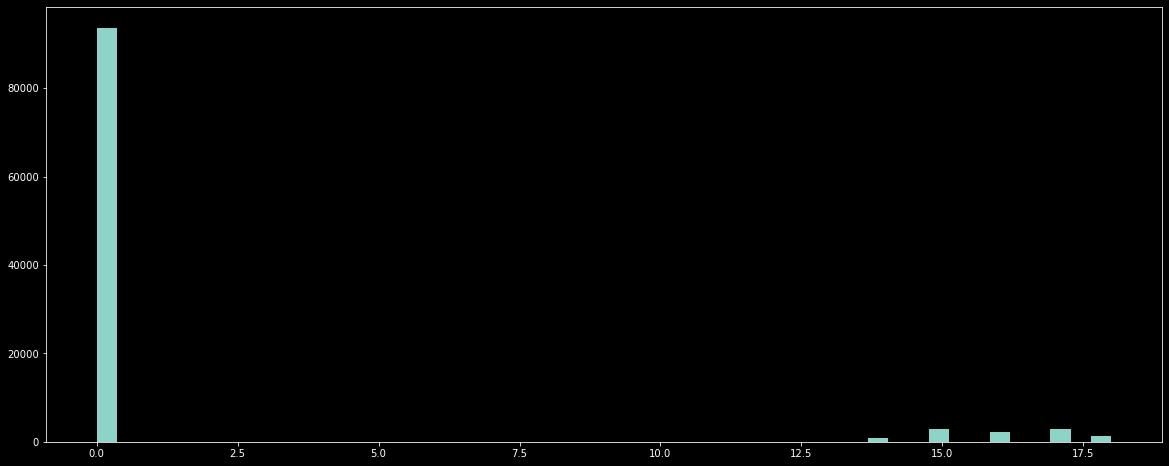

In [24]:
# como é o score de dados nestes grupos ?
no_score_score_series = df.loc[df['score_desc'].isin(no_score), 'score']
print('valor máximo:', no_score_score_series.max())
plt.hist(no_score_score_series, bins = 50)
plt.show()

In [25]:
# dividir dados entre 'low', 'medium', 'high', 'no_score'
# primeiramente, crio o grupo que não possui score

In [38]:
def categorize_score_desc(x):
    if 'No' in x:
        return('no_score')
    if 'Low' in x:
        return 'low'
    if 'Medium' in x:
        return 'medium'
    if 'High' in x:
        return 'high'
    
df['score_desc'] = df['score_desc'].apply(lambda x: categorize_score_desc(x)) 

In [41]:
# os grupos diferem quanto à ocorrência de 'default'; quão representativo é cada um ?
score_types = df['score_desc'].unique().tolist()
score_types

['low', 'medium', 'no_score', 'high']

In [47]:
# que proporção da base é composta por cada grupo

print('low:', round(len(df.loc[df['score_desc'] == 'low']) / len(df) * 100, 2), '%')
print('medium:', round(len(df.loc[df['score_desc'] == 'medium']) / len(df) * 100, 2), '%')
print('high:', round(len(df.loc[df['score_desc'] == 'high']) / len(df) * 100, 2), '%')
print('no_score:', round(len(df.loc[df['score_desc'] == 'no_score']) / len(df) * 100, 2), '%')

low: 29.6 %
medium: 5.26 %
high: 9.4 %
no_score: 55.74 %


In [50]:
# que proporção de cada grupo entra em 'default'

print('low:', round(df.loc[df['score_desc'] == 'low', 'default'].value_counts(1).iloc[1] * 100, 2), '%')
print('medium:', round(df.loc[df['score_desc'] == 'medium', 'default'].value_counts(1).iloc[1] * 100, 2), '%')
print('high:', round(df.loc[df['score_desc'] == 'high', 'default'].value_counts(1).iloc[1] * 100, 2), '%')
print('no_score:', 
      round(df.loc[df['score_desc'] == 'no_score', 'default'].value_counts(1).iloc[1] * 100, 2), '%')

low: 16.34 %
medium: 25.67 %
high: 28.47 %
no_score: 22.92 %


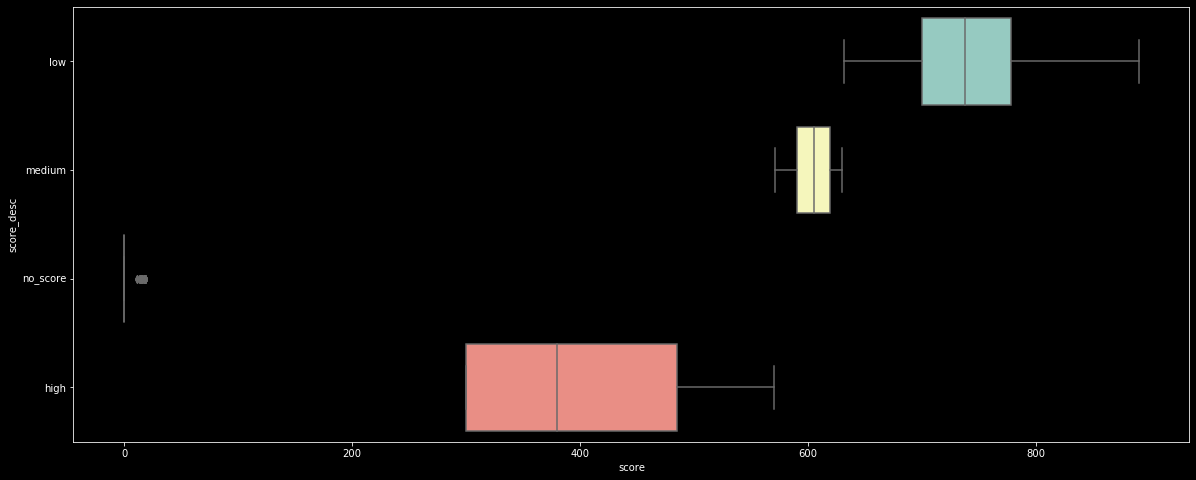

In [55]:
# não vejo necessidade de manter ambas 'score_desc' e 'score'
# outra abordagem para o problema, dividir 'score' em percentis, assim, teríamos grupos de tamanhos
# mais homogêneos (não de mesmo tamanho, por causa do grupo sem score)

sns.boxplot(df['score'], df['score_desc'])
plt.show()

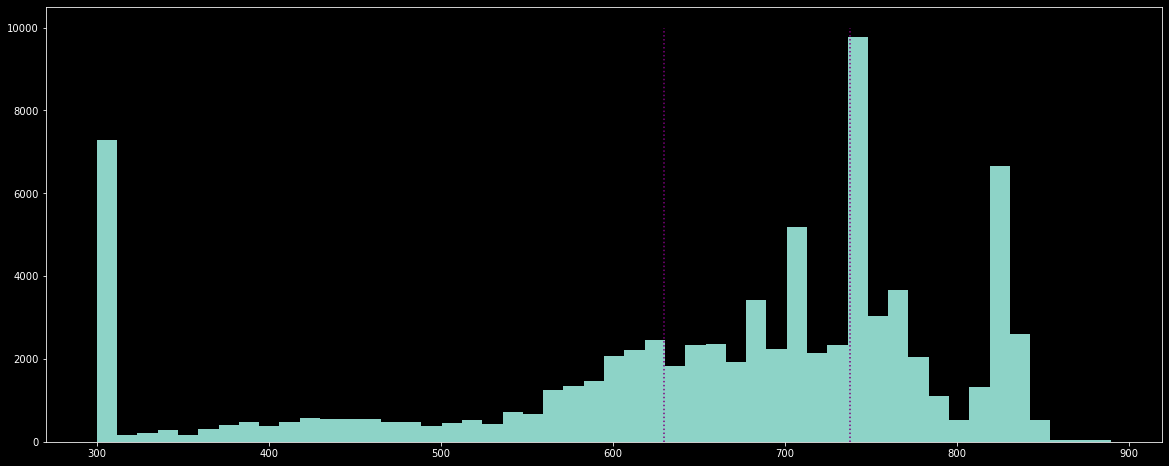

In [73]:
# analisando score, por meio da categorização da variável 'score'
# primeiramente, separar dados sem score

# df_no_score
# df_w_score

# obter percentis nos dados do dataframe 'df_w_score', este, diferentemente do df original, não possui
# grande volume de zeros, meu plano é tratar a coluna 'score' de forma semelhante a coluna 'score_desc' 

score_threshold1 = np.quantile(df_w_score['score'], 0.33)
score_threshold2 = np.quantile(df_w_score['score'], 0.66)

plt.hist(df_w_score['score'], bins = 50)
plt.plot([score_threshold1, score_threshold1], [0, 10000], ls = ':', color = 'purple')
plt.plot([score_threshold2, score_threshold2], [0, 10000], ls = ':', color = 'purple')
plt.show()

In [75]:
def categorize_score(x, threshold1, threshold2):
    if x < 200:
        return 'no_score'
    if x >= 200 and x < threshold1:
        return 'low'
    if x >= threshold1 and x < threshold2:
        return 'medium'
    if x >= threshold2:
        return 'high'
    
df['score'] = df['score'].apply(lambda x: categorize_score(x, score_threshold1, score_threshold2))

In [77]:
df['score'].value_counts(1)

# 'low', 'medium' e 'high' possuem aproximadamente o mesmo tamanho

no_score    0.557368
high        0.159830
low         0.145044
medium      0.137758
Name: score, dtype: float64

In [85]:
# ocorrência de 'default' por score, 'no_score' apresenta mais o menos a mesma frequência da base inicial

print('low:', round(df.loc[df['score'] == 'low', 'default'].value_counts(1).iloc[1] * 100, 2), '%')
print('medium:', round(df.loc[df['score'] == 'medium', 'default'].value_counts(1).iloc[1] * 100, 2), '%')
print('high:', round(df.loc[df['score'] == 'high', 'default'].value_counts(1).iloc[1] * 100, 2), '%')
print('')
print('no_score:', round(df.loc[df['score'] == 'no_score', 'default'].value_counts(1).iloc[1] * 100, 2), '%')

low: 27.56 %
medium: 16.96 %
high: 15.83 %

no_score: 22.92 %


In [86]:
pd.crosstab(df['score'], df['default'])

default,0,1
score,,
high,25094,4718
low,19598,7456
medium,21336,4359
no_score,80133,23829


In [90]:
est, p, dof, exp = chi2_contingency(pd.crosstab(df['score'], df['default']))
crit = chi2.ppf(df = dof, q = 0.9999999999)

In [91]:
est

1585.289896073119

In [92]:
crit

49.542155758766434